**Vamos treinar o modelo com as classes desbalanceadas?**

In [87]:
import pickle
with open('../sample_data/breast_cancer.pkl','rb') as f:
  X_treino, x_teste, y_treino, y_teste = pickle.load(f)

In [88]:
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(n_estimators = 100, max_features = 6, criterion = 'entropy', random_state = 0)
modelo.fit(X_treino, y_treino)

RandomForestClassifier(criterion='entropy', max_features=6, random_state=0)

In [89]:
previsoes = modelo.predict(x_teste)

In [90]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste, previsoes)

0.7413793103448276

In [91]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[35,  5],
       [10,  8]], dtype=int64)

0.7413793103448276

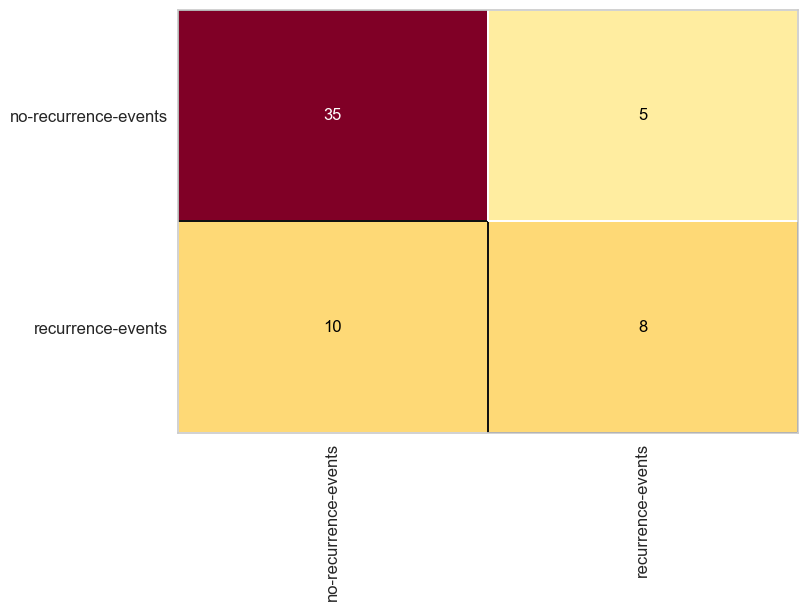

In [92]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(x_teste, y_teste)

**A classe majoritária está muito mais baixa que a minoritária - desbalanceamento**

In [93]:
print(classification_report(y_teste, previsoes))

                      precision    recall  f1-score   support

no-recurrence-events       0.78      0.88      0.82        40
   recurrence-events       0.62      0.44      0.52        18

            accuracy                           0.74        58
           macro avg       0.70      0.66      0.67        58
        weighted avg       0.73      0.74      0.73        58



**Vamos balancear os dados usando um metódo undersampling**

In [94]:
!pip install imbalanced-learn

In [95]:
from imblearn.under_sampling import TomekLinks

In [96]:
balanceamento_under = TomekLinks(sampling_strategy = 'auto')
X_under, y_under = balanceamento_under.fit_resample(X_treino, y_treino)

In [97]:
X_under.shape, y_under.shape

((215, 38), (215,))

**Quantas instâncias tinha em cada classe originalmente?**

In [98]:
import numpy as np
np.unique(y_treino, return_counts = True)

(array(['no-recurrence-events', 'recurrence-events'], dtype=object),
 array([161,  67], dtype=int64))

**Quantas instâncias tem agora após o balanceamento?**

In [99]:
np.unique(y_under, return_counts=True) # reduziu algumas instâncias na classe majoritária

(array(['no-recurrence-events', 'recurrence-events'], dtype=object),
 array([148,  67], dtype=int64))

**Vamos ver se o balanceamento melhorou a qualidade do modelo?**

In [100]:
modelo2 = RandomForestClassifier(n_estimators=100, max_features=6, criterion='entropy', random_state = 0)
modelo2.fit(X_under, y_under)

RandomForestClassifier(criterion='entropy', max_features=6, random_state=0)

In [101]:
previsoes = modelo2.predict(x_teste)

In [102]:
accuracy_score(y_teste, previsoes)

0.7586206896551724

0.7586206896551724

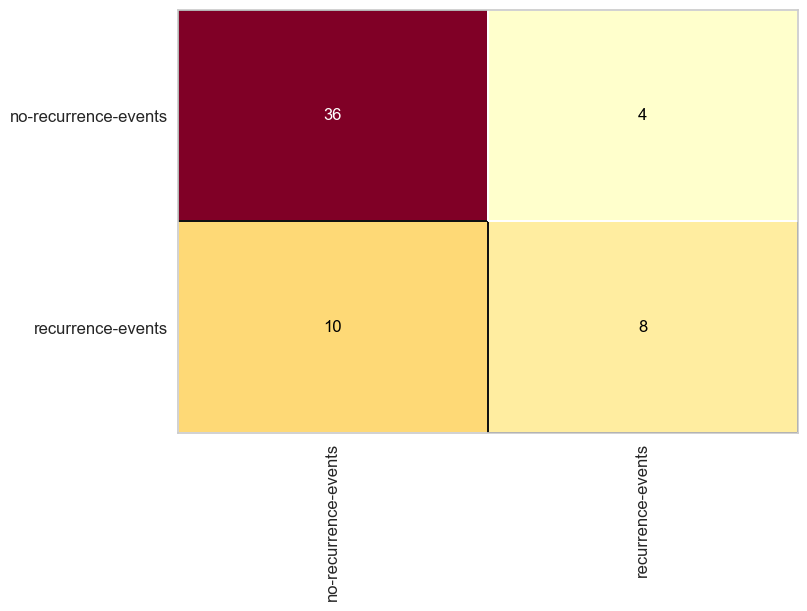

In [103]:
cm = ConfusionMatrix(modelo2)
cm.fit(X_under, y_under)
cm.score(x_teste, y_teste)

In [104]:
print(classification_report(y_teste, previsoes))

                      precision    recall  f1-score   support

no-recurrence-events       0.78      0.90      0.84        40
   recurrence-events       0.67      0.44      0.53        18

            accuracy                           0.76        58
           macro avg       0.72      0.67      0.69        58
        weighted avg       0.75      0.76      0.74        58



**Vamos balancear os dados usando um método oversampling?**

In [105]:
from imblearn.over_sampling import SMOTE

In [106]:
balanceamento_over = SMOTE(sampling_strategy = 'minority')
X_over, y_over = balanceamento_over.fit_resample(X_treino, y_treino)

In [107]:
X_over.shape, y_over.shape

((322, 38), (322,))

**Quantas instâncias tinha em cada classe originalmente?**

In [108]:
np.unique(y_treino, return_counts=True)

(array(['no-recurrence-events', 'recurrence-events'], dtype=object),
 array([161,  67], dtype=int64))

**Quantas instâncias tem agora após o balanceamento (com o oversampling)?**

In [109]:
np.unique(y_over, return_counts=True) # aumenta a classe minoritária, até chegar à classe majoritária

(array(['no-recurrence-events', 'recurrence-events'], dtype=object),
 array([161, 161], dtype=int64))

O balanceamento - oversampling - melhorou a qualidade do modelo?

In [110]:
modelo3 = RandomForestClassifier(n_estimators = 100, max_features = 6, criterion='entropy', random_state = 0)
modelo3.fit(X_over, y_over)

RandomForestClassifier(criterion='entropy', max_features=6, random_state=0)

In [111]:
previsoes = modelo3.predict(x_teste)

In [112]:
accuracy_score(y_teste, previsoes)

0.7413793103448276

0.7413793103448276

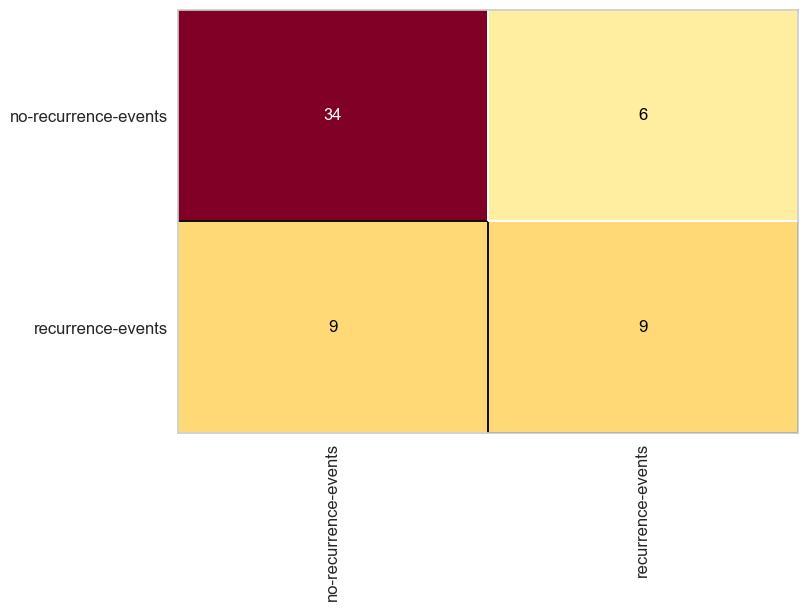

In [113]:
cm = ConfusionMatrix(modelo3)
cm.fit(X_over, y_over)
cm.score(x_teste, y_teste)

In [114]:
print(classification_report(y_teste, previsoes))

                      precision    recall  f1-score   support

no-recurrence-events       0.79      0.85      0.82        40
   recurrence-events       0.60      0.50      0.55        18

            accuracy                           0.74        58
           macro avg       0.70      0.68      0.68        58
        weighted avg       0.73      0.74      0.73        58

